In [4]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import time
import csv

# Set up Selenium WebDriver
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Run in headless mode
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")

# Automatically download and manage ChromeDriver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# Define URL
URL = "https://www.amazon.sg/gp/bestsellers/baby/"

# Open the Amazon Best Sellers page
driver.get(URL)
time.sleep(5)  # Allow time for the page to load

# Scroll to the bottom of the page to load all products
def scroll_to_bottom():
    last_height = driver.execute_script("return document.body.scrollHeight")
    while True:
        # Scroll down to the bottom
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(2)  # Wait for new products to load

        # Calculate new scroll height and compare with last scroll height
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break  # Stop scrolling if no new content is loaded
        last_height = new_height

# Scroll to load all products
scroll_to_bottom()

# Parse the page with BeautifulSoup
soup = BeautifulSoup(driver.page_source, "html.parser")

# Find product containers
products = soup.find_all("div", class_="p13n-sc-uncoverable-faceout")

# List to store scraped data
scraped_data = []

for product in products:
    try:
        # Extract Product Name
        name_tag = product.find("div", class_=lambda x: x and "p13n-sc-css-line-clamp" in x)
        product_name = name_tag.text.strip() if name_tag else "N/A"

        # Extract Product URL
        link_tag = product.find("a", class_="a-link-normal")
        product_url = "https://www.amazon.sg" + link_tag["href"] if link_tag else "N/A"

        # Extract Price
        price_tag = product.find("span", class_=lambda x: x and "price" in x.lower())
        alt_price_tag = product.find("span", class_="a-price-whole")  # Alternative price location
        product_price = price_tag.text.strip() if price_tag else (alt_price_tag.text.strip() if alt_price_tag else "N/A")

        # Extract Ratings
        rating_tag = product.find("span", class_="a-icon-alt")
        rating = rating_tag.text.strip() if rating_tag else "N/A"

        # Append to list (excluding Number of Reviews)
        scraped_data.append({
            "Product Name": product_name,
            "Product URL": product_url,
            "Product Price": product_price,
            "Rating": rating
        })

    except Exception as e:
        print(f"Error processing product: {e}")

# Close the driver
driver.quit()

# Write scraped data to a CSV file
csv_filename = "amazon_products.csv"
with open(csv_filename, mode="w", newline="", encoding="utf-8") as file:
    fieldnames = ["Product Name", "Product URL", "Product Price", "Rating"]
    writer = csv.DictWriter(file, fieldnames=fieldnames)

    # Write the header
    writer.writeheader()

    # Write the data rows
    for item in scraped_data:
        writer.writerow(item)

print(f"Scraping completed! Data saved to {csv_filename}.")

Scraping completed! Data saved to amazon_products.csv.


In [5]:
# to save to items above in a csv file
import pandas as pd
df = pd.DataFrame(scraped_data)
df



,Product Name,Product URL,Product Price,Rating
0,"WaterWipes Sensitive Baby Wipes, 720 Count (12...",https://www.amazon.sg/WaterWipes-Sensitive-Wip...,S$69.90,4.7 out of 5 stars
1,Termichy Stackable Formula Dispenser Portable ...,https://www.amazon.sg/Termichy-Stackable-Dispe...,S$25.75,4.7 out of 5 stars
2,"Baby Bjorn Bouncer Bliss Air Gray, 1 Piece (x ...",https://www.amazon.sg/Bjorn-Bouncer-Bliss-Piec...,S$250.24,4.6 out of 5 stars
3,"Baby Proofing, 10ft(0.4x0.4in) Clear Furniture...",https://www.amazon.sg/Proofing-0-4x0-4in-Furni...,S$7.00,3.9 out of 5 stars
4,"Pampers Ninjamas, Bedwetting Overnight Diapers...",https://www.amazon.sg/Ninjamas-Bedwetting-Over...,S$61.72,4.5 out of 5 stars
5,"Ubbi Disposable Diaper Sacks, Lavender Scented...",https://www.amazon.sg/Ubbi-Disposable-Lavender...,S$23.46,4.8 out of 5 stars
6,Dreamegg White Noise Machine - Portable Sound ...,https://www.amazon.sg/Dreamegg-White-Noise-Mac...,S$46.09,4.6 out of 5 stars
7,olababy Clear View Silicone Training Cup with ...,https://www.amazon.sg/Silicone-Training-Toddle...,S$37.99,4.4 out of 5 stars
8,Omah 40pcs X 30 packs native wood pulp Baby ca...,https://www.amazon.sg/Anti-Bacterial-Portable-...,S$16.98,N/A
9,Organic Butter Breastfeeding Cream by Earth Ma...,https://www.amazon.sg/Breastfeeding-Earth-Mama...,S$21.80,4.7 out of 5 stars


In [6]:
df['Rating'] = df['Rating'].astype(str).fillna('')
df['Numeric Rating'] = df['Rating'].str.extract(r'(\d+\.?\d*)').astype(float)
df

,Product Name,Product URL,Product Price,Rating,Numeric Rating
0,"WaterWipes Sensitive Baby Wipes, 720 Count (12...",https://www.amazon.sg/WaterWipes-Sensitive-Wip...,S$69.90,4.7 out of 5 stars,4.7
1,Termichy Stackable Formula Dispenser Portable ...,https://www.amazon.sg/Termichy-Stackable-Dispe...,S$25.75,4.7 out of 5 stars,4.7
2,"Baby Bjorn Bouncer Bliss Air Gray, 1 Piece (x ...",https://www.amazon.sg/Bjorn-Bouncer-Bliss-Piec...,S$250.24,4.6 out of 5 stars,4.6
3,"Baby Proofing, 10ft(0.4x0.4in) Clear Furniture...",https://www.amazon.sg/Proofing-0-4x0-4in-Furni...,S$7.00,3.9 out of 5 stars,3.9
4,"Pampers Ninjamas, Bedwetting Overnight Diapers...",https://www.amazon.sg/Ninjamas-Bedwetting-Over...,S$61.72,4.5 out of 5 stars,4.5
5,"Ubbi Disposable Diaper Sacks, Lavender Scented...",https://www.amazon.sg/Ubbi-Disposable-Lavender...,S$23.46,4.8 out of 5 stars,4.8
6,Dreamegg White Noise Machine - Portable Sound ...,https://www.amazon.sg/Dreamegg-White-Noise-Mac...,S$46.09,4.6 out of 5 stars,4.6
7,olababy Clear View Silicone Training Cup with ...,https://www.amazon.sg/Silicone-Training-Toddle...,S$37.99,4.4 out of 5 stars,4.4
8,Omah 40pcs X 30 packs native wood pulp Baby ca...,https://www.amazon.sg/Anti-Bacterial-Portable-...,S$16.98,N/A,NaN
9,Organic Butter Breastfeeding Cream by Earth Ma...,https://www.amazon.sg/Breastfeeding-Earth-Mama...,S$21.80,4.7 out of 5 stars,4.7


Findings: 3 NA are 0 rating

In [7]:
# replace numeric rating with 0 if it is not available
df['Numeric Rating'] = df['Numeric Rating'].fillna(0)
# save to csv
df.to_csv('amazon_productsR.csv', index=False)
print('Data saved to amazon_productsR.csv')

Data saved to amazon_productsR.csv


In [8]:
# to create a new column name Rank and assign a rank to each product based on index
df['Rank'] = df.index + 1
df

,Product Name,Product URL,Product Price,Rating,Numeric Rating,Rank
0,"WaterWipes Sensitive Baby Wipes, 720 Count (12...",https://www.amazon.sg/WaterWipes-Sensitive-Wip...,S$69.90,4.7 out of 5 stars,4.7,1
1,Termichy Stackable Formula Dispenser Portable ...,https://www.amazon.sg/Termichy-Stackable-Dispe...,S$25.75,4.7 out of 5 stars,4.7,2
2,"Baby Bjorn Bouncer Bliss Air Gray, 1 Piece (x ...",https://www.amazon.sg/Bjorn-Bouncer-Bliss-Piec...,S$250.24,4.6 out of 5 stars,4.6,3
3,"Baby Proofing, 10ft(0.4x0.4in) Clear Furniture...",https://www.amazon.sg/Proofing-0-4x0-4in-Furni...,S$7.00,3.9 out of 5 stars,3.9,4
4,"Pampers Ninjamas, Bedwetting Overnight Diapers...",https://www.amazon.sg/Ninjamas-Bedwetting-Over...,S$61.72,4.5 out of 5 stars,4.5,5
5,"Ubbi Disposable Diaper Sacks, Lavender Scented...",https://www.amazon.sg/Ubbi-Disposable-Lavender...,S$23.46,4.8 out of 5 stars,4.8,6
6,Dreamegg White Noise Machine - Portable Sound ...,https://www.amazon.sg/Dreamegg-White-Noise-Mac...,S$46.09,4.6 out of 5 stars,4.6,7
7,olababy Clear View Silicone Training Cup with ...,https://www.amazon.sg/Silicone-Training-Toddle...,S$37.99,4.4 out of 5 stars,4.4,8
8,Omah 40pcs X 30 packs native wood pulp Baby ca...,https://www.amazon.sg/Anti-Bacterial-Portable-...,S$16.98,N/A,0.0,9
9,Organic Butter Breastfeeding Cream by Earth Ma...,https://www.amazon.sg/Breastfeeding-Earth-Mama...,S$21.80,4.7 out of 5 stars,4.7,10


In [9]:
# to save to csv
df.to_csv('amazon_productsR.csv', index=False)
print('Data saved to amazon_productsR.csv')

Data saved to amazon_productsR.csv


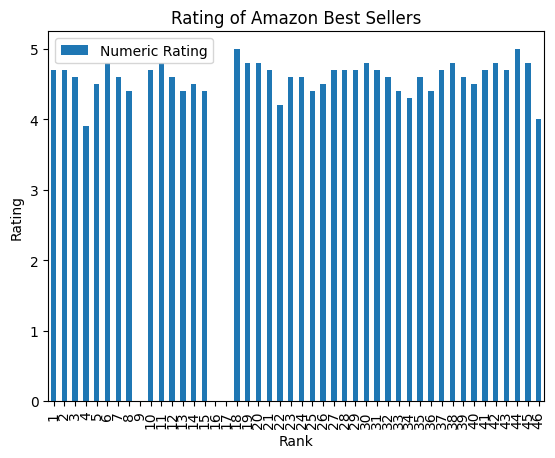

In [10]:
# to create a bar chart for the ratings of the ranked products
import matplotlib.pyplot as plt
df.plot(x='Rank', y='Numeric Rating', kind='bar')
plt.xlabel('Rank')
plt.ylabel('Rating')
plt.title('Rating of Amazon Best Sellers')
plt.show()

In [14]:
# to scrape the details of the products with the df['Product URL']
import time
import csv
from datetime import datetime
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

# Set up Selenium WebDriver
options = Options()
options.add_argument("--headless")  # Run in headless mode
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")

# Automatically download and manage ChromeDriver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# List of product URLs
product_urls = df['Product URL'].dropna().tolist()  # Remove NaN values and convert to a list

# Function to scrape product details
def scrape_product_details(url):
    driver.get(url)
    time.sleep(5)  # Allow time for the page to load

    soup = BeautifulSoup(driver.page_source, "html.parser")

    # Initialize default values
    product_details = {
        "Material": "N/A",
        "Colour": "N/A",
        "Brand": "N/A",
        "Material Type": "N/A",
        "Age Range": "N/A",
        "Manufacturer": "N/A",
        "Rating": "N/A",  # Initialize rating as "N/A"
        "Total Ratings": "N/A"  # Initialize total ratings as "N/A"
    }

    try:
        # Extract Brand and Manufacturer from the product overview section
        product_overview = soup.find("div", {"id": "productOverview_feature_div"})
        if product_overview:
            rows = product_overview.find_all("tr")
            for row in rows:
                header = row.find("th").text.strip().lower() if row.find("th") else ""
                value = row.find("td").text.strip() if row.find("td") else ""
                if "brand" in header:
                    product_details["Brand"] = value
                elif "manufacturer" in header:
                    product_details["Manufacturer"] = value

        # Extract details from the product information table
        table = soup.find("table", {"id": "productDetails_techSpec_section_1"})  # Updated table ID
        if not table:
            table = soup.find("table", {"id": "productDetails_detailBullets_sections1"})  # Fallback table ID

        if table:
            rows = table.find_all("tr")
            for row in rows:
                header = row.find("th")  # Look for <th> for header
                value = row.find("td")  # Look for <td> for value
                if header and value:
                    header_text = header.text.strip().lower()
                    value_text = value.text.strip()

                    if "material" in header_text:
                        product_details["Material"] = value_text
                    elif "colour" in header_text:
                        product_details["Colour"] = value_text
                    elif "material type" in header_text:
                        product_details["Material Type"] = value_text
                    elif "age range" in header_text:
                        product_details["Age Range"] = value_text

        # Extract Numeric Rating
        rating_tag = soup.find("span", {"class": "a-icon-alt"})
        if rating_tag:
            rating_text = rating_tag.text.strip().split()[0]  # Extract numeric part
            try:
                product_details["Rating"] = float(rating_text)  # Convert to float
            except ValueError:
                pass  # Keep as "N/A" if conversion fails

        # Extract Total Ratings Count
        total_ratings_tag = soup.find("span", {"id": "acrCustomerReviewText"})
        if total_ratings_tag:
            total_ratings_text = total_ratings_tag.text.strip().split()[0].replace(",", "")
            try:
                product_details["Total Ratings"] = int(total_ratings_text)  # Convert to integer
            except ValueError:
                pass  # Keep as "N/A" if conversion fails

    except Exception as e:
        print(f"Error scraping {url}: {e}")

    return product_details

# List to store all product details
all_product_details = []

# Scrape details for each product
for url in product_urls:
    print(f"Scraping {url}...")
    product_details = scrape_product_details(url)
    product_details["Product URL"] = url  # Add the URL to the details
    product_details["Scrape Date"] = datetime.now().strftime("%Y-%m-%d")  # Add scrape date
    all_product_details.append(product_details)

# Close the driver
driver.quit()

# Write data to CSV
csv_filename = "amazon_product_details.csv"
with open(csv_filename, "w", newline="", encoding="utf-8") as file:
    fieldnames = [
        "Product URL", "Material", "Colour", "Brand", "Material Type", "Age Range", "Manufacturer", 
        "Rating", "Total Ratings", "Scrape Date"
    ]
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(all_product_details)

print(f"Scraping completed! Data saved to {csv_filename}.")


Scraping https://www.amazon.sg/WaterWipes-Sensitive-Wipes-Count-100005/dp/B008KJEYLO/ref=zg_bs_g_baby_d_sccl_1/358-5705576-1414654?psc=1...
Scraping https://www.amazon.sg/Termichy-Stackable-Dispenser-Portable-Container/dp/B0BJKGJZHW/ref=zg_bs_g_baby_d_sccl_2/358-5705576-1414654?psc=1...
Scraping https://www.amazon.sg/Bjorn-Bouncer-Bliss-Piece-Month/dp/B086Z2638H/ref=zg_bs_g_baby_d_sccl_3/358-5705576-1414654?psc=1...
Scraping https://www.amazon.sg/Proofing-0-4x0-4in-Furniture-Protector-Protectors/dp/B0BFJVG9M9/ref=zg_bs_g_baby_d_sccl_4/358-5705576-1414654?psc=1...
Scraping https://www.amazon.sg/Ninjamas-Bedwetting-Overnight-Disposable-Underwear/dp/B0886ZX14J/ref=zg_bs_g_baby_d_sccl_5/358-5705576-1414654?psc=1...
Scraping https://www.amazon.sg/Ubbi-Disposable-Lavender-Recycled-Material/dp/B07J54TGXY/ref=zg_bs_g_baby_d_sccl_6/358-5705576-1414654?psc=1...
Scraping https://www.amazon.sg/Dreamegg-White-Noise-Machine-Canceling/dp/B0BBQX7P5J/ref=zg_bs_g_baby_d_sccl_7/358-5705576-1414654?psc=1.

In [15]:
df1 = pd.read_csv('amazon_product_details.csv')
df1

,Product URL,Material,Colour,Brand,Material Type,Age Range,Manufacturer,Rating,Total Ratings,Scrape Date
0,https://www.amazon.sg/WaterWipes-Sensitive-Wip...,NaN,NaN,NaN,NaN,‎Baby,NaN,4.7,26223.0,2025-03-09
1,https://www.amazon.sg/Termichy-Stackable-Dispe...,"‎Polypropylene, Plastic",‎Warm Grey,NaN,NaN,NaN,NaN,4.7,558.0,2025-03-09
2,https://www.amazon.sg/Bjorn-Bouncer-Bliss-Piec...,"‎Main body frame: steel, Seat main part: 100% ...",NaN,NaN,NaN,NaN,NaN,4.6,61.0,2025-03-09
3,https://www.amazon.sg/Proofing-0-4x0-4in-Furni...,‎Silicone,NaN,NaN,NaN,NaN,NaN,3.9,501.0,2025-03-09
4,https://www.amazon.sg/Ninjamas-Bedwetting-Over...,NaN,NaN,NaN,NaN,‎Kid,NaN,4.5,10765.0,2025-03-09
5,https://www.amazon.sg/Ubbi-Disposable-Lavender...,NaN,NaN,NaN,NaN,NaN,NaN,4.8,4001.0,2025-03-09
6,https://www.amazon.sg/Dreamegg-White-Noise-Mac...,NaN,NaN,NaN,NaN,‎All Ages,NaN,4.6,7340.0,2025-03-09
7,https://www.amazon.sg/Silicone-Training-Toddle...,‎Silicone,NaN,NaN,NaN,NaN,NaN,4.4,1343.0,2025-03-09
8,https://www.amazon.sg/Anti-Bacterial-Portable-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-09
9,https://www.amazon.sg/Breastfeeding-Earth-Mama...,NaN,NaN,NaN,NaN,"‎Adult,Baby",NaN,4.7,54287.0,2025-03-09


In [16]:
# add a new colum named total rating to df from df1 where the product url matches
df['Total Ratings'] = df['Product URL'].map(df1.set_index('Product URL')['Total Ratings'])
df

,Product Name,Product URL,Product Price,Rating,Numeric Rating,Rank,Total Ratings
0,"WaterWipes Sensitive Baby Wipes, 720 Count (12...",https://www.amazon.sg/WaterWipes-Sensitive-Wip...,S$69.90,4.7 out of 5 stars,4.7,1,26223.0
1,Termichy Stackable Formula Dispenser Portable ...,https://www.amazon.sg/Termichy-Stackable-Dispe...,S$25.75,4.7 out of 5 stars,4.7,2,558.0
2,"Baby Bjorn Bouncer Bliss Air Gray, 1 Piece (x ...",https://www.amazon.sg/Bjorn-Bouncer-Bliss-Piec...,S$250.24,4.6 out of 5 stars,4.6,3,61.0
3,"Baby Proofing, 10ft(0.4x0.4in) Clear Furniture...",https://www.amazon.sg/Proofing-0-4x0-4in-Furni...,S$7.00,3.9 out of 5 stars,3.9,4,501.0
4,"Pampers Ninjamas, Bedwetting Overnight Diapers...",https://www.amazon.sg/Ninjamas-Bedwetting-Over...,S$61.72,4.5 out of 5 stars,4.5,5,10765.0
5,"Ubbi Disposable Diaper Sacks, Lavender Scented...",https://www.amazon.sg/Ubbi-Disposable-Lavender...,S$23.46,4.8 out of 5 stars,4.8,6,4001.0
6,Dreamegg White Noise Machine - Portable Sound ...,https://www.amazon.sg/Dreamegg-White-Noise-Mac...,S$46.09,4.6 out of 5 stars,4.6,7,7340.0
7,olababy Clear View Silicone Training Cup with ...,https://www.amazon.sg/Silicone-Training-Toddle...,S$37.99,4.4 out of 5 stars,4.4,8,1343.0
8,Omah 40pcs X 30 packs native wood pulp Baby ca...,https://www.amazon.sg/Anti-Bacterial-Portable-...,S$16.98,N/A,0.0,9,NaN
9,Organic Butter Breastfeeding Cream by Earth Ma...,https://www.amazon.sg/Breastfeeding-Earth-Mama...,S$21.80,4.7 out of 5 stars,4.7,10,54287.0


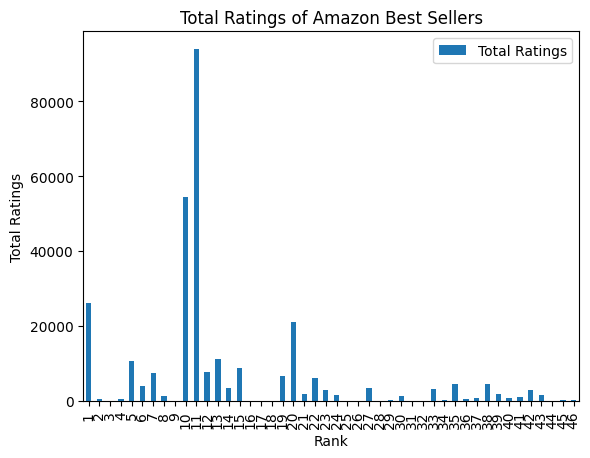

In [17]:
# create a bar chart for the total ratings of the ranked products
df.plot(x='Rank', y='Total Ratings', kind='bar')
plt.xlabel('Rank')
plt.ylabel('Total Ratings')
plt.title('Total Ratings of Amazon Best Sellers')
plt.show()

In [18]:
# to save to csv
df.to_csv('amazon_productsF.csv', index=False)
print('Data saved to amazon_productsF.csv')

Data saved to amazon_productsF.csv


In [20]:
# to choose the top 10 products based on the total ratings
df2 = df.nlargest(10, 'Total Ratings')
df2
# to save to csv
df2.to_csv('amazon_top10rating.csv', index=False)

In [21]:
df2

,Product Name,Product URL,Product Price,Rating,Numeric Rating,Rank,Total Ratings
10,"Dr. Brown's Original Nipple, Level 3 (6m+), (P...",https://www.amazon.sg/Dr-Browns-Original-Nippl...,S$14.67,4.8 out of 5 stars,4.8,11,93903.0
9,Organic Butter Breastfeeding Cream by Earth Ma...,https://www.amazon.sg/Breastfeeding-Earth-Mama...,S$21.80,4.7 out of 5 stars,4.7,10,54287.0
0,"WaterWipes Sensitive Baby Wipes, 720 Count (12...",https://www.amazon.sg/WaterWipes-Sensitive-Wip...,S$69.90,4.7 out of 5 stars,4.7,1,26223.0
19,Aveeno Baby Mommy & Me Daily Bathtime Gift Set...,https://www.amazon.sg/Aveeno-Baby-Bathtime-Inc...,S$34.40,4.8 out of 5 stars,4.8,20,21099.0
12,Safety 1st Sleepy Baby Nail Clipper,https://www.amazon.sg/Safety-1st-Sleepy-Baby-C...,S$18.76,4.4 out of 5 stars,4.4,13,11260.0
4,"Pampers Ninjamas, Bedwetting Overnight Diapers...",https://www.amazon.sg/Ninjamas-Bedwetting-Over...,S$61.72,4.5 out of 5 stars,4.5,5,10765.0
14,"Baby Proof Cabinet Latches, Childproof Drawer ...",https://www.amazon.sg/Cabinet-Childproof-Adhes...,S$23.51,4.4 out of 5 stars,4.4,15,8871.0
11,"MAM Easy Active Baby Bottle 11 oz with Bonus, ...",https://www.amazon.sg/MAM-Skinsoft-Silicone-Er...,S$36.18,4.6 out of 5 stars,4.6,12,7737.0
6,Dreamegg White Noise Machine - Portable Sound ...,https://www.amazon.sg/Dreamegg-White-Noise-Mac...,S$46.09,4.6 out of 5 stars,4.6,7,7340.0
18,"Sudocrem Antiseptic Healing Cream, 125 grams",https://www.amazon.sg/Sudocrem-Antiseptic-Heal...,S$13.79,4.8 out of 5 stars,4.8,19,6529.0


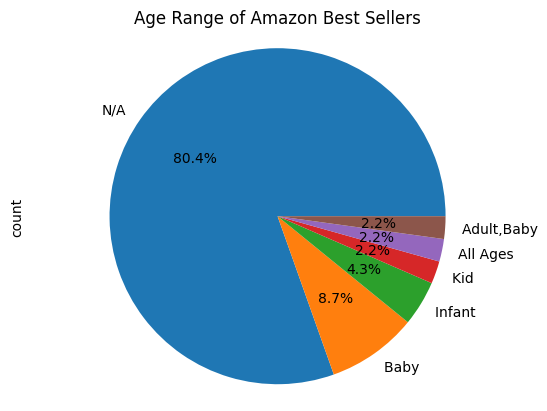

In [23]:
# create a pie chart for age range of all products,if not available, replace with 'N/A'
df1['Age Range'] = df1['Age Range'].fillna('N/A')
df1['Age Range'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Age Range of Amazon Best Sellers')
plt.show()


In [24]:
df

,Product Name,Product URL,Product Price,Rating,Numeric Rating,Rank,Total Ratings
0,"WaterWipes Sensitive Baby Wipes, 720 Count (12...",https://www.amazon.sg/WaterWipes-Sensitive-Wip...,S$69.90,4.7 out of 5 stars,4.7,1,26223.0
1,Termichy Stackable Formula Dispenser Portable ...,https://www.amazon.sg/Termichy-Stackable-Dispe...,S$25.75,4.7 out of 5 stars,4.7,2,558.0
2,"Baby Bjorn Bouncer Bliss Air Gray, 1 Piece (x ...",https://www.amazon.sg/Bjorn-Bouncer-Bliss-Piec...,S$250.24,4.6 out of 5 stars,4.6,3,61.0
3,"Baby Proofing, 10ft(0.4x0.4in) Clear Furniture...",https://www.amazon.sg/Proofing-0-4x0-4in-Furni...,S$7.00,3.9 out of 5 stars,3.9,4,501.0
4,"Pampers Ninjamas, Bedwetting Overnight Diapers...",https://www.amazon.sg/Ninjamas-Bedwetting-Over...,S$61.72,4.5 out of 5 stars,4.5,5,10765.0
5,"Ubbi Disposable Diaper Sacks, Lavender Scented...",https://www.amazon.sg/Ubbi-Disposable-Lavender...,S$23.46,4.8 out of 5 stars,4.8,6,4001.0
6,Dreamegg White Noise Machine - Portable Sound ...,https://www.amazon.sg/Dreamegg-White-Noise-Mac...,S$46.09,4.6 out of 5 stars,4.6,7,7340.0
7,olababy Clear View Silicone Training Cup with ...,https://www.amazon.sg/Silicone-Training-Toddle...,S$37.99,4.4 out of 5 stars,4.4,8,1343.0
8,Omah 40pcs X 30 packs native wood pulp Baby ca...,https://www.amazon.sg/Anti-Bacterial-Portable-...,S$16.98,N/A,0.0,9,NaN
9,Organic Butter Breastfeeding Cream by Earth Ma...,https://www.amazon.sg/Breastfeeding-Earth-Mama...,S$21.80,4.7 out of 5 stars,4.7,10,54287.0
